In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [26]:
data_path = r"/yellow_tripdata_2025-01.parquet"
df = pd.read_parquet(data_path)

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [28]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2682650,2,2025-01-29 17:57:14,2025-01-29 18:12:06,2.0,0.72,1.0,N,237,237,1,13.5,2.50,0.5,4.15,0.0,1.0,24.90,2.5,0.0,0.75
1673813,1,2025-01-18 22:01:18,2025-01-18 22:10:32,1.0,1.40,1.0,N,140,170,1,10.0,4.25,0.5,1.00,0.0,1.0,16.75,2.5,0.0,0.75
949050,2,2025-01-11 18:40:52,2025-01-11 19:03:33,2.0,1.79,1.0,N,142,90,1,19.8,0.00,0.5,1.50,0.0,1.0,26.05,2.5,0.0,0.75
1061594,2,2025-01-12 20:24:49,2025-01-12 20:44:25,2.0,3.29,1.0,N,148,68,1,19.8,1.00,0.5,5.11,0.0,1.0,30.66,2.5,0.0,0.75
2591918,2,2025-01-28 19:06:00,2025-01-28 19:21:28,2.0,2.22,1.0,N,233,236,1,14.9,2.50,0.5,2.20,0.0,1.0,24.35,2.5,0.0,0.75


In [29]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06,3.475226e+06
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01,4.834093e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01,3.619307e-01


In [30]:
df.dropna(inplace=True)

In [31]:
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['ETA'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['ETA'] = df['ETA'].dt.total_seconds()/ 60

In [32]:
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [33]:
df.drop(columns=['mta_tax'], inplace=True)

data vizualizations

In [34]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,tpep_pickup_hour,tpep_dropoff_hour,day_of_week,ETA
count,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06,2.935077e+06
mean,1.775325e+00,1.297859e+00,3.194121e+00,2.482535e+00,1.668033e+02,1.659061e+02,1.227395e+00,1.754083e+01,1.552770e+00,3.421266e+00,4.995772e-01,9.467418e-01,2.662824e+01,2.225237e+00,1.239111e-01,4.733998e-01,1.437275e+01,1.445124e+01,3.020915e+00,1.495558e+01
std,4.318827e-01,7.507503e-01,4.261888e+01,1.163277e+01,6.296517e+01,6.888160e+01,5.901148e-01,5.042894e+02,1.928508e+00,3.876587e+00,2.115799e+00,3.016270e-01,5.044845e+02,9.039932e-01,4.725090e-01,3.653123e-01,5.540009e+00,5.626394e+00,1.838545e+00,4.191288e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,-7.500000e+00,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-5.147232e+04
25%,2.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,8.600000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.554000e+01,2.500000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,2.000000e+00,6.933333e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.210000e+01,1.000000e+00,2.810000e+00,0.000000e+00,1.000000e+00,2.018000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.500000e+01,1.500000e+01,3.000000e+00,1.125000e+01
75%,2.000000e+00,1.000000e+00,2.990000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.910000e+01,2.500000e+00,4.200000e+00,0.000000e+00,1.000000e+00,2.820000e+01,2.500000e+00,0.000000e+00,7.500000e-01,1.900000e+01,1.900000e+01,4.000000e+00,1.805000e+01
max,7.000000e+00,9.000000e+00,4.473030e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01,2.300000e+01,2.300000e+01,6.000000e+00,5.626317e+03


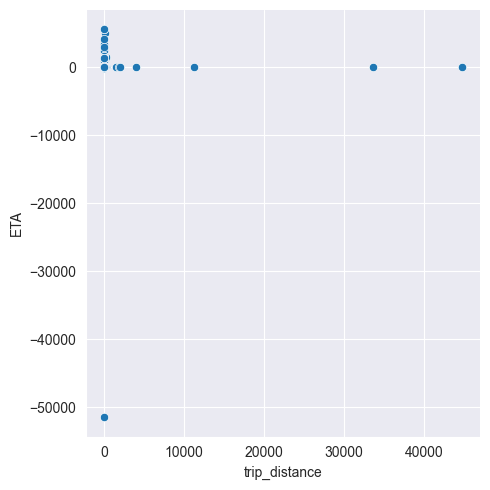

In [35]:
sns.relplot(data =df, x='trip_distance', y='ETA', kind='scatter')

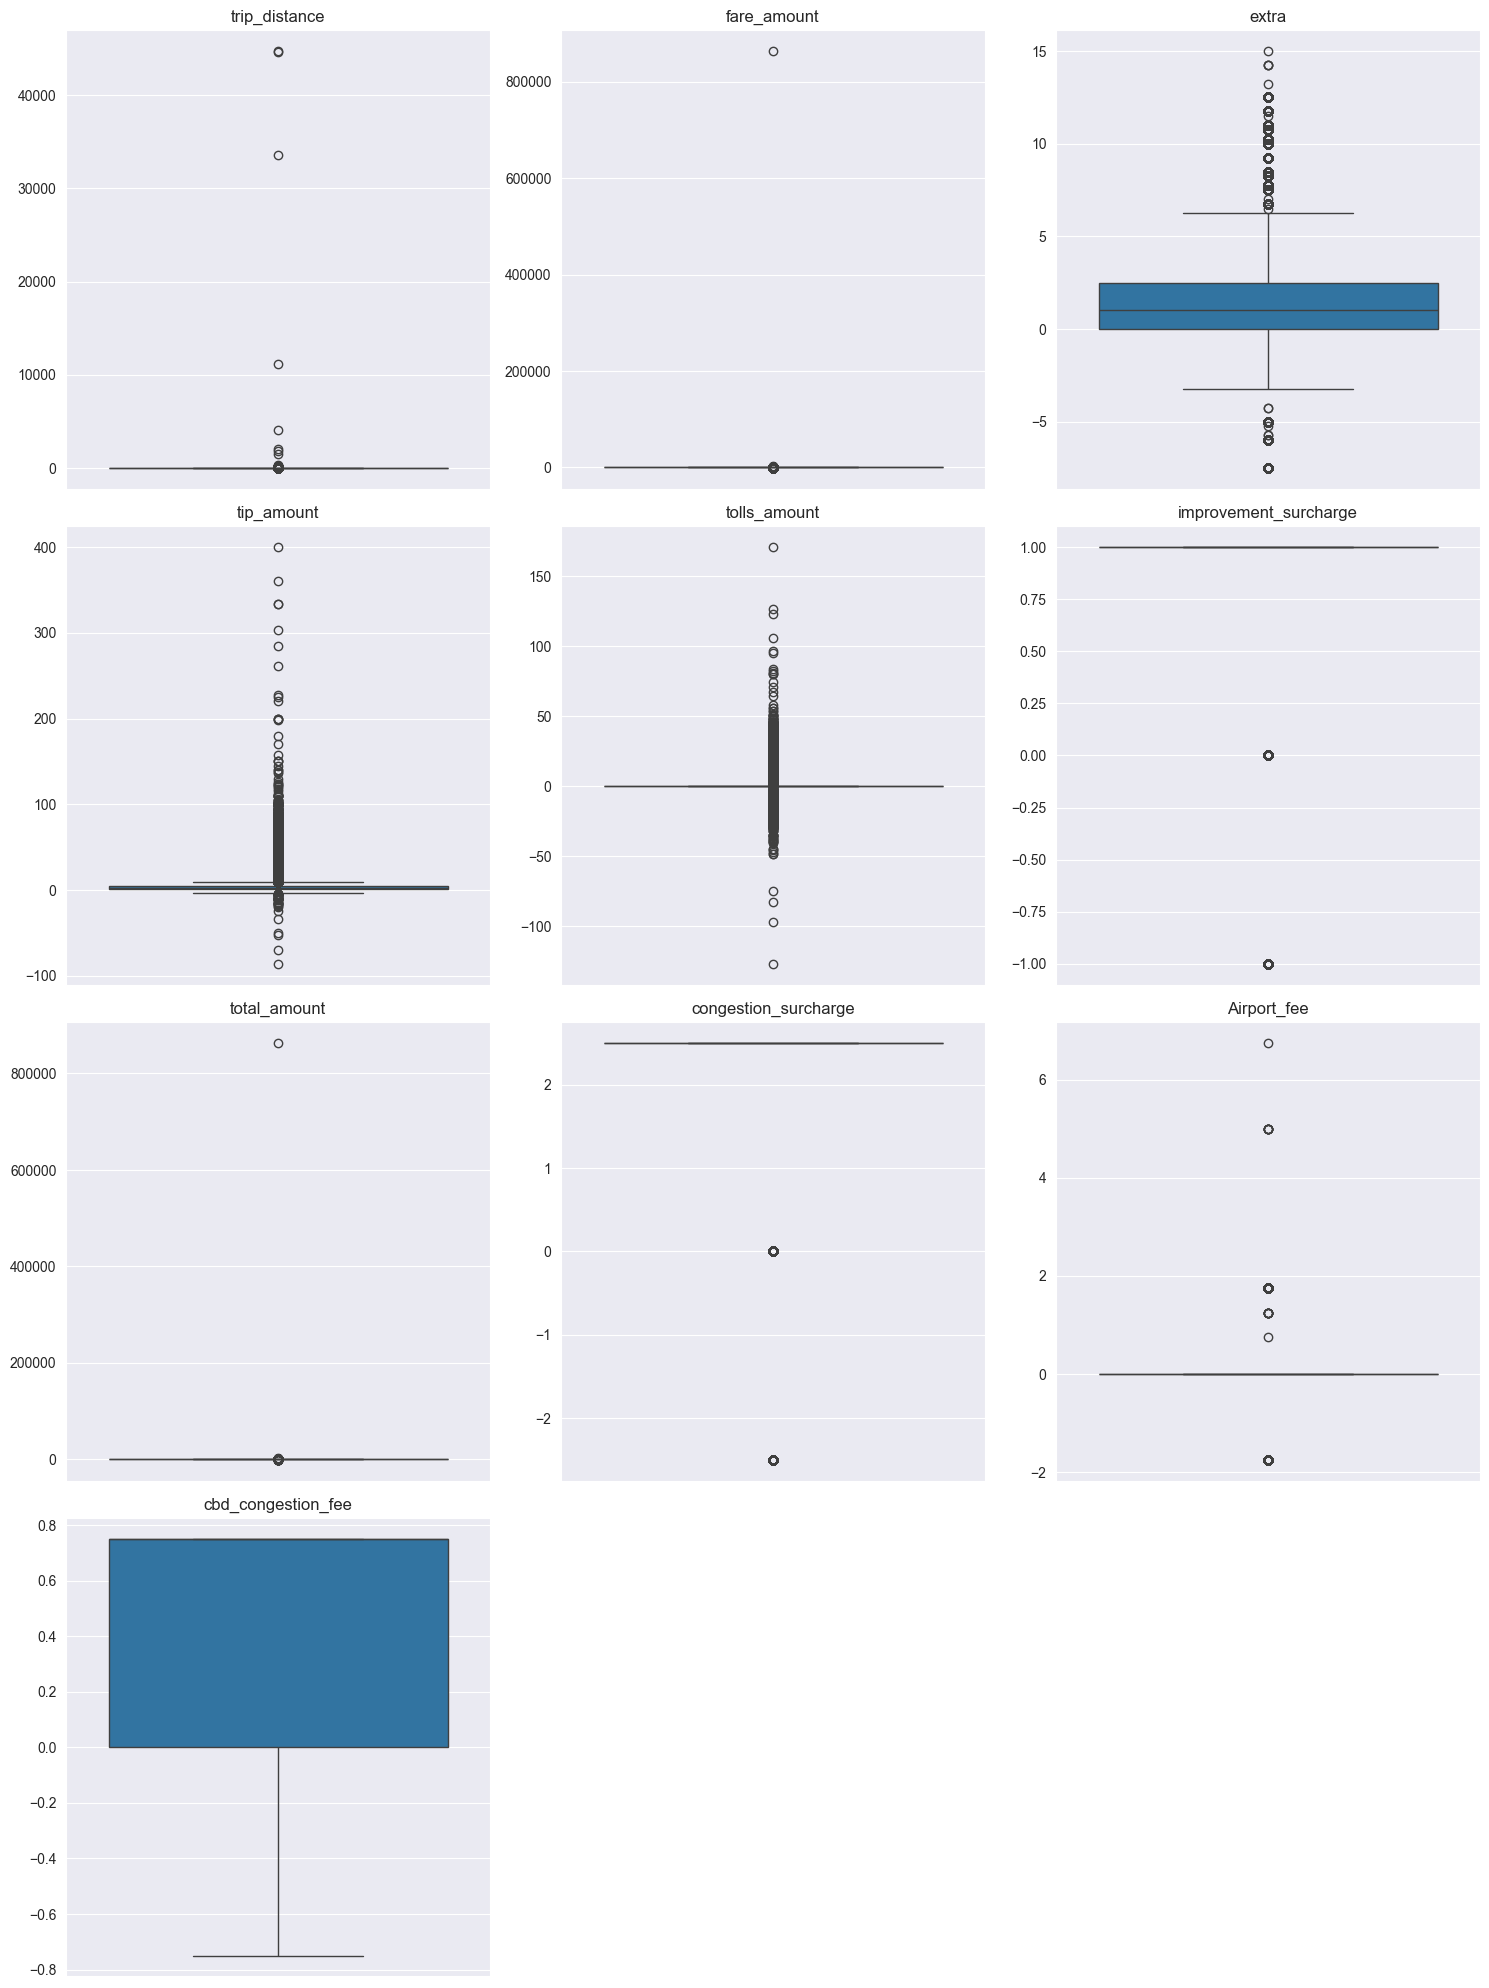

In [36]:
columns = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_fee','cbd_congestion_fee']

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

if len(columns) < 12:
    for j in range(len(columns), 12):
        fig.delaxes(axes[j])

plt.tight_layout()


<Axes: >

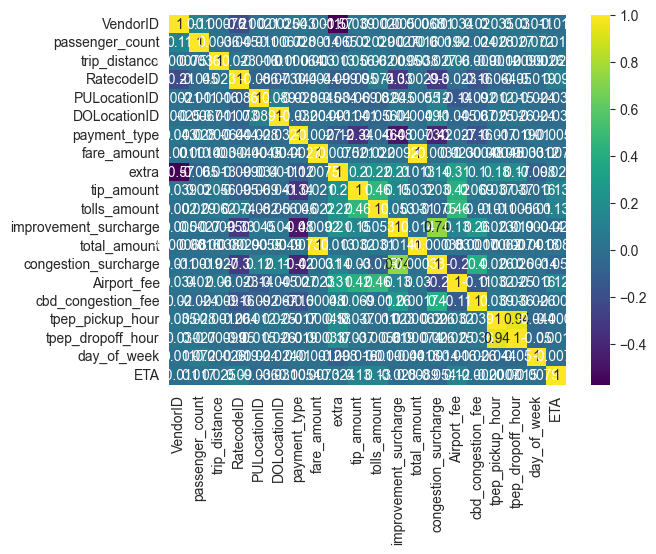

In [37]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='viridis')

Outlier removal

In [38]:
columns = ['trip_distance', 'fare_amount', 'extra', 'ETA', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_fee','cbd_congestion_fee']

for cols in columns:
    lower_bound = df[cols].quantile(0.05)
    upper_bound = df[cols].quantile(0.95)
    df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)

In [39]:
df = df[df['ETA'] > 0]

split data

In [40]:
x_all, x_test, y_all, y_test = train_test_split(
    df.drop(columns=['ETA']),
    df['ETA'],
    test_size=0.2,
    random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_all,
    y_all,
    test_size=0.2,
    random_state=42)


model pipeline

In [41]:
cat_cols = ['VendorID', 'passenger_count', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'day_of_week', 'RatecodeID','tpep_pickup_hour','tpep_dropoff_hour']
num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee','cbd_congestion_fee']

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num' , StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop = 'first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

In [43]:
def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, x_val, y_val, cv=kfold, scoring='r2')

    output.append(scores.mean())


    pipeline.fit(x_train,y_train)

    y_pred = pipeline.predict(x_test)

    y_pred = (y_pred)

    output.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    return output

In [44]:
model_dict = {
    'linear_reg':LinearRegression(),
    'gradient boosting': XGBRegressor(),
    'catboost': CatBoostRegressor(),
    'LightGBM': LGBMRegressor()
}

In [45]:
model_output = []
for model_name,model in model_dict.items():
  model_output.append(scorer(model_name, model))

model_df = pd.DataFrame(model_output, columns=['name','r2','rmse']).sort_values(by='rmse')

model_df

C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Kabi

Learning rate set to 0.101506
0:	learn: 8.4122609	total: 31.9ms	remaining: 31.9s
1:	learn: 7.7258751	total: 52ms	remaining: 26s
2:	learn: 7.1193318	total: 71ms	remaining: 23.6s
3:	learn: 6.5744397	total: 86.6ms	remaining: 21.6s
4:	learn: 6.0931113	total: 103ms	remaining: 20.5s
5:	learn: 5.6764120	total: 118ms	remaining: 19.5s
6:	learn: 5.3088832	total: 132ms	remaining: 18.8s
7:	learn: 4.9867808	total: 146ms	remaining: 18.1s
8:	learn: 4.7046844	total: 159ms	remaining: 17.5s
9:	learn: 4.4550554	total: 172ms	remaining: 17.1s
10:	learn: 4.2310782	total: 185ms	remaining: 16.7s
11:	learn: 4.0343858	total: 197ms	remaining: 16.2s
12:	learn: 3.8646992	total: 210ms	remaining: 16s
13:	learn: 3.7191415	total: 224ms	remaining: 15.8s
14:	learn: 3.5874007	total: 238ms	remaining: 15.6s
15:	learn: 3.4692794	total: 251ms	remaining: 15.5s
16:	learn: 3.3708807	total: 265ms	remaining: 15.3s
17:	learn: 3.2789829	total: 278ms	remaining: 15.2s
18:	learn: 3.1983628	total: 291ms	remaining: 15s
19:	learn: 3.1249

C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.101506
0:	learn: 8.4109768	total: 12.1ms	remaining: 12.1s
1:	learn: 7.7342840	total: 52.7ms	remaining: 26.3s
2:	learn: 7.1267323	total: 75.2ms	remaining: 25s
3:	learn: 6.5928971	total: 95.2ms	remaining: 23.7s
4:	learn: 6.1197914	total: 111ms	remaining: 22.2s
5:	learn: 5.7027225	total: 127ms	remaining: 21.1s
6:	learn: 5.3266260	total: 143ms	remaining: 20.3s
7:	learn: 5.0028332	total: 159ms	remaining: 19.7s
8:	learn: 4.7175149	total: 176ms	remaining: 19.4s
9:	learn: 4.4654973	total: 190ms	remaining: 18.8s
10:	learn: 4.2410068	total: 204ms	remaining: 18.3s
11:	learn: 4.0453256	total: 215ms	remaining: 17.7s
12:	learn: 3.8772837	total: 227ms	remaining: 17.2s
13:	learn: 3.7323461	total: 238ms	remaining: 16.8s
14:	learn: 3.5992076	total: 250ms	remaining: 16.4s
15:	learn: 3.4953190	total: 262ms	remaining: 16.1s
16:	learn: 3.3942570	total: 273ms	remaining: 15.8s
17:	learn: 3.3064943	total: 285ms	remaining: 15.5s
18:	learn: 3.2228303	total: 296ms	remaining: 15.3s
19:	learn

C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.101506
0:	learn: 8.4152784	total: 13.7ms	remaining: 13.7s
1:	learn: 7.7335302	total: 26.6ms	remaining: 13.3s
2:	learn: 7.1245535	total: 39.3ms	remaining: 13.1s
3:	learn: 6.5849847	total: 53.8ms	remaining: 13.4s
4:	learn: 6.1098325	total: 66.7ms	remaining: 13.3s
5:	learn: 5.6978036	total: 79.6ms	remaining: 13.2s
6:	learn: 5.3228596	total: 92.7ms	remaining: 13.2s
7:	learn: 5.0002700	total: 105ms	remaining: 13.1s
8:	learn: 4.7176929	total: 118ms	remaining: 13s
9:	learn: 4.4663885	total: 131ms	remaining: 13s
10:	learn: 4.2473946	total: 144ms	remaining: 12.9s
11:	learn: 4.0450554	total: 161ms	remaining: 13.2s
12:	learn: 3.8783216	total: 175ms	remaining: 13.3s
13:	learn: 3.7205126	total: 188ms	remaining: 13.3s
14:	learn: 3.5986018	total: 201ms	remaining: 13.2s
15:	learn: 3.4862775	total: 213ms	remaining: 13.1s
16:	learn: 3.3875109	total: 226ms	remaining: 13.1s
17:	learn: 3.2984252	total: 238ms	remaining: 13s
18:	learn: 3.2205947	total: 252ms	remaining: 13s
19:	learn: 3

C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.134722
0:	learn: 8.1871574	total: 88.3ms	remaining: 1m 28s
1:	learn: 7.3174245	total: 177ms	remaining: 1m 28s
2:	learn: 6.5769582	total: 265ms	remaining: 1m 28s
3:	learn: 5.9531529	total: 350ms	remaining: 1m 27s
4:	learn: 5.4182534	total: 427ms	remaining: 1m 25s
5:	learn: 4.9709405	total: 507ms	remaining: 1m 23s
6:	learn: 4.6037327	total: 587ms	remaining: 1m 23s
7:	learn: 4.2974784	total: 685ms	remaining: 1m 24s
8:	learn: 4.0267370	total: 773ms	remaining: 1m 25s
9:	learn: 3.8101742	total: 854ms	remaining: 1m 24s
10:	learn: 3.6347832	total: 934ms	remaining: 1m 23s
11:	learn: 3.4704343	total: 1s	remaining: 1m 22s
12:	learn: 3.3375530	total: 1.08s	remaining: 1m 22s
13:	learn: 3.2281387	total: 1.19s	remaining: 1m 24s
14:	learn: 3.1381563	total: 1.28s	remaining: 1m 24s
15:	learn: 3.0552172	total: 1.37s	remaining: 1m 24s
16:	learn: 2.9891054	total: 1.45s	remaining: 1m 23s
17:	learn: 2.9231471	total: 1.52s	remaining: 1m 22s
18:	learn: 2.8684839	total: 1.59s	remaining: 1

C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 313075, number of used features: 455
[LightGBM] [Info] Start training from score 13.823638


C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1822
[LightGBM] [Info] Number of data points in the train set: 313075, number of used features: 442
[LightGBM] [Info] Start training from score 13.819178


C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 313076, number of used features: 454
[LightGBM] [Info] Start training from score 13.815671


C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 1878448, number of used features: 550
[LightGBM] [Info] Start training from score 13.828374


C:\Users\Kabir Ghuge\Documents\MLOps\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,name,r2,rmse
2,catboost,0.965496,1.636617
1,gradient boosting,0.962807,1.721595
3,LightGBM,0.961598,1.782304
0,linear_reg,0.837232,3.695274


C:\Users\Kabir Ghuge\AppData\Local\Temp\ipykernel_10176\4111364268.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="rmse", y="name", data=compare, palette="viridis")


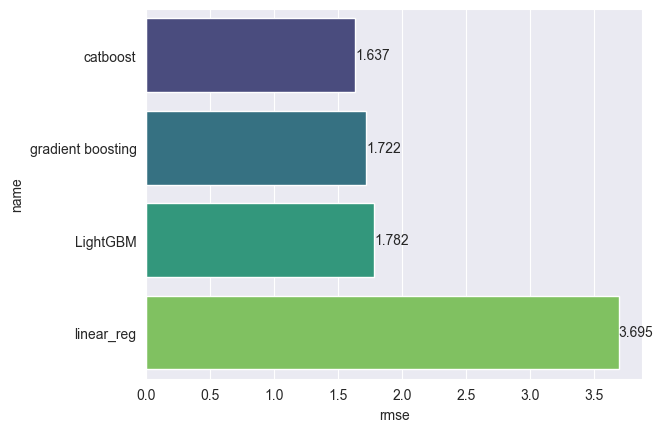

C:\Users\Kabir Ghuge\AppData\Local\Temp\ipykernel_10176\4111364268.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="r2", y="name", data=compare, palette="viridis")


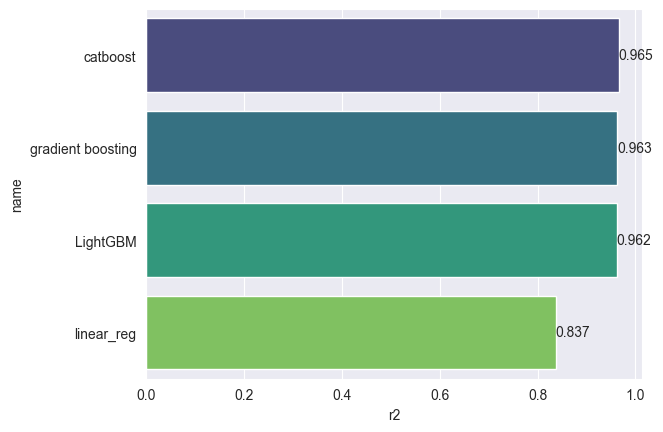

In [46]:
compare = model_df.copy()

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.subplot()
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="name", data=compare, palette="viridis")
labels(ax)
plt.show()

plt.subplot()
compare = compare.sort_values(by="r2", ascending=False)
ax=sns.barplot(x="r2", y="name", data=compare, palette="viridis")
labels(ax)